In [ ]:
EMBEDDING_DIM = 50
SENTENCE_LENGTH = 256
GLOVE_FILE = f'glove.6B.{EMBEDDING_DIM}d.txt'

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np

### Load SMS Spam Data

In [ ]:
df = pd.read_csv('/content/SMSSpamCollection.txt', sep='\t', names=['label', 'data'])
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print(df.shape[0])

5572


In [ ]:
df['Message_Length'] = df['data'].apply(len)

longest_message = df.loc[df['Message_Length'].idxmax(), 'data']
longest_message_length = df['Message_Length'].max()

print("Longest message:", longest_message)
print("Length of longest message:", longest_message_length)
average_length = df['Message_Length'].mean()
print("average length:",average_length)
long_messages_count = (df['Message_Length'] > 256).sum()

print("Number of messages longer than 250 characters:", long_messages_count)

Longest message: For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..
Length of longest message: 910
average length: 80.48994974874371
Number 

In [ ]:
# @title download glove embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip && unzip glove.6B.zip

--2024-11-05 02:28:10--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-05 02:28:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-05 02:28:11--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# @title store the word embeddings into a dictionary
embeddings = {}

with open(GLOVE_FILE, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.strip().split()
        w = values[0]
        vectors = np.asarray(values[1:], dtype='float32')
        embeddings[w] = vectors

### OOV Tokens
We will use the average of our word embeddings for out of vocabulary tokens.

In [ ]:
# Get number of vectors and hidden dim
with open(GLOVE_FILE, 'r') as f:
    for i, line in enumerate(f):
        pass
n_vec = i + 1
hidden_dim = len(line.split(' ')) - 1

vecs = np.zeros((n_vec, hidden_dim), dtype=np.float32)

with open(GLOVE_FILE, 'r') as f:
    for i, line in enumerate(f):
        vecs[i] = np.array([float(n) for n in line.split(' ')[1:]], dtype=np.float32)

average_vec = np.mean(vecs, axis=0)
print(average_vec)

[-0.12920076 -0.28866628 -0.01224866 -0.05676644 -0.20210965 -0.08389011
  0.33359843  0.16045167  0.03867431  0.17833012  0.04696583 -0.00285802
  0.29099807  0.04613704 -0.20923874 -0.06613114 -0.06822549  0.07665912
  0.3134014   0.17848536 -0.1225775  -0.09916984 -0.07495987  0.06413227
  0.14441176  0.60894334  0.17463093  0.05335403 -0.01273871  0.03474107
 -0.8123879  -0.04688699  0.20193407  0.2031118  -0.03935686  0.06967544
 -0.01553638 -0.03405238 -0.06528071  0.12250231  0.13991883 -0.17446303
 -0.08011883  0.0849521  -0.01041659 -0.13705009  0.20127155  0.10069408
  0.00653003  0.01685157]


In [ ]:
# Sample embedding
embeddings['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32)

In [ ]:
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
translator = str.maketrans('', '', string.punctuation)

def normalize_word(text):
    # Remove white space, cast to lowercase,
    # remove punctuation and numbers
    text = text.lower()
    text = text.translate(translator)
    text = text.strip(' ')
    text = re.sub(r'\d+', '', text)
#     text = ps.stem(text)
    return text

### Encode Text into Numpy Array
This process is done by encoding each word of each sentence to its word vector. We pad our sentences with a 0 matrix to make them all the same length

In [ ]:
import string
WARN = True
def encode_sentence(sentence, embeddings, sentence_length=SENTENCE_LENGTH):
    encoded_sentence = []
    words = list(map(lambda w: normalize_word(w), sentence.split(' ')))
    for word in words:
        if word == '':
            continue
        if len(encoded_sentence) >= sentence_length:
            break
        if word in embeddings:
            word_embedding = embeddings[word]
        else:
            word_embedding = average_vec
#             continue

        encoded_sentence.append(word_embedding)

    # Zero Pad embeddings to sentence_length for LSTM batch training
    while len(encoded_sentence) < sentence_length:
        encoded_sentence.append(np.zeros((EMBEDDING_DIM)))
    return np.array(encoded_sentence)

In [ ]:
# Sample embedded sentence zero padded to a length of 3
encode_sentence("hello there", embeddings, 3)

array([[-0.38497001,  0.80092001,  0.064106  , -0.28354999, -0.026759  ,
        -0.34531999, -0.64253002, -0.11729   , -0.33256999,  0.55242997,
        -0.087813  ,  0.90350002,  0.47102001,  0.56656998,  0.69849998,
        -0.35229   , -0.86541998,  0.90573001,  0.03576   , -0.071705  ,
        -0.12327   ,  0.54922998,  0.47005001,  0.35572001,  1.26110005,
        -0.67580998, -0.94983   ,  0.68665999,  0.38710001, -1.34920001,
         0.63511997,  0.46416   , -0.48813999,  0.83827001, -0.92460001,
        -0.33722001,  0.53741002, -1.06159997, -0.081403  , -0.67110997,
         0.30923   , -0.39230001, -0.55001998, -0.68826997,  0.58048999,
        -0.11626   ,  0.013139  , -0.57653999,  0.048833  ,  0.67203999],
       [ 0.68491   ,  0.32385001, -0.11592   , -0.35925001,  0.49889001,
         0.042541  , -0.40153   , -0.36793   , -0.61440998, -0.41148001,
        -0.34819999, -0.21952   , -0.22393   , -0.64965999,  0.85443002,
         0.33581999,  0.2931    ,  0.16552   , -0.

In [ ]:
def encode_X(dfx, embeddings):
    encoded_df = []
    for x in dfx.values:
        sentence_embedding = encode_sentence(x, embeddings)
        encoded_df.append(sentence_embedding)
    np.concatenate(encoded_df, axis=0)
    return np.array(encoded_df)

# Split our data into Training, Validation, and Test

In [ ]:
# Shuffle df
df = df.sample(frac=1).reset_index(drop=True)
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [ ]:
X = df['data']
X_train = X[0:int(X.shape[0]*.6)]
X_val = X[int(X.shape[0]*.6):int(X.shape[0]*.75)]
X_test = X[int(X.shape[0]*.75):]

X_train = encode_X(X_train, embeddings)
X_val = encode_X(X_val, embeddings)
X_test = encode_X(X_test, embeddings)

In [ ]:
y = df['label']
y_train = y[0:int(y.shape[0]*.6)]
y_val = y[int(y.shape[0]*.6):int(y.shape[0]*.75)]
y_test = y[int(y.shape[0]*.75):]

print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

HAM = 0
SPAM = 1

y_train = np.array(list(map(lambda x: HAM if x == 'ham' else SPAM, y_train)))
y_val = np.array(list(map(lambda x: HAM if x == 'ham' else SPAM, y_val)))
y_test = np.array(list(map(lambda x: HAM if x == 'ham' else SPAM, y_test)))

label
ham     2889
spam     454
Name: count, dtype: int64
label
ham     730
spam    106
Name: count, dtype: int64
label
ham     1206
spam     187
Name: count, dtype: int64


### Build LSTM

In [ ]:
import tensorflow as tf
print(X_test.shape)

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(256, input_shape=(SENTENCE_LENGTH, EMBEDDING_DIM)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(2e-5),
              metrics=['accuracy'])

(1393, 256, 50)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Train LSTM

In [ ]:
history = model.fit(x=X_train, y=y_train, epochs=5,
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 1/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8649 - loss: 0.6888 - val_accuracy: 0.8732 - val_loss: 0.6293
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8659 - loss: 0.4627 - val_accuracy: 0.8732 - val_loss: 0.3079
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8875 - loss: 0.2518 - val_accuracy: 0.9438 - val_loss: 0.1956
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9485 - loss: 0.1703 - val_accuracy: 0.9486 - val_loss: 0.1929
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9545 - loss: 0.1597 - val_accuracy: 0.9474 - val_loss: 0.1915


In [ ]:
#saving
model.save('spam_detector.keras')

### Visualize Loss

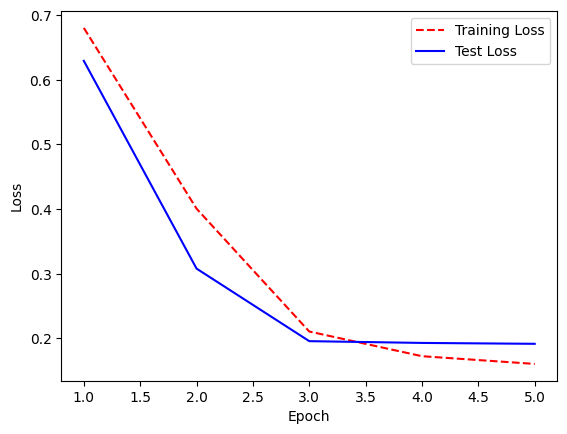

In [ ]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Test LSTM

In [ ]:
test_results = model.test_on_batch(
    X_test,
    y=y_test,
)
print(list(zip(model.metrics_names, test_results)))

[('loss', array(0.18047023, dtype=float32)), ('compile_metrics', array(0.948856, dtype=float32))]


In [ ]:
y_pred = model.predict(X_test).round()
y_pred = list(map(lambda x: int(x[0]), y_pred))
confusion = tf.math.confusion_matrix(labels=y_test, predictions=y_pred, num_classes=2)
confusion = confusion.numpy()

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [ ]:
tn = confusion[0][0]  # True Negatives
fp = confusion[0][1]  # False Positives
fn = confusion[1][0]  # False Negatives
tp = confusion[1][1]  # True Positives

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
true_positive_rate = tp / (tp + fn)  # Sensitivity
false_negative_rate = fn / (tp + fn)  # FNR
precision = tp / (tp + fp)  # Positive Predictive Value
f1_score = 2 * (precision * true_positive_rate) / (precision + true_positive_rate)

# Print results
print(f"Accuracy: {round(accuracy * 100, 2)}%")
print(f"True Positive Rate (Sensitivity): {round(true_positive_rate * 100, 2)}%")
print(f"False Negative Rate: {round(false_negative_rate * 100, 2)}%")
print(f"Precision: {round(precision * 100, 2)}%")
print(f"F1 Score: {round(f1_score, 2)}")


Accuracy: 94.97%
True Positive Rate (Sensitivity): 75.94%
False Negative Rate: 24.06%
Precision: 85.03%
F1 Score: 0.8


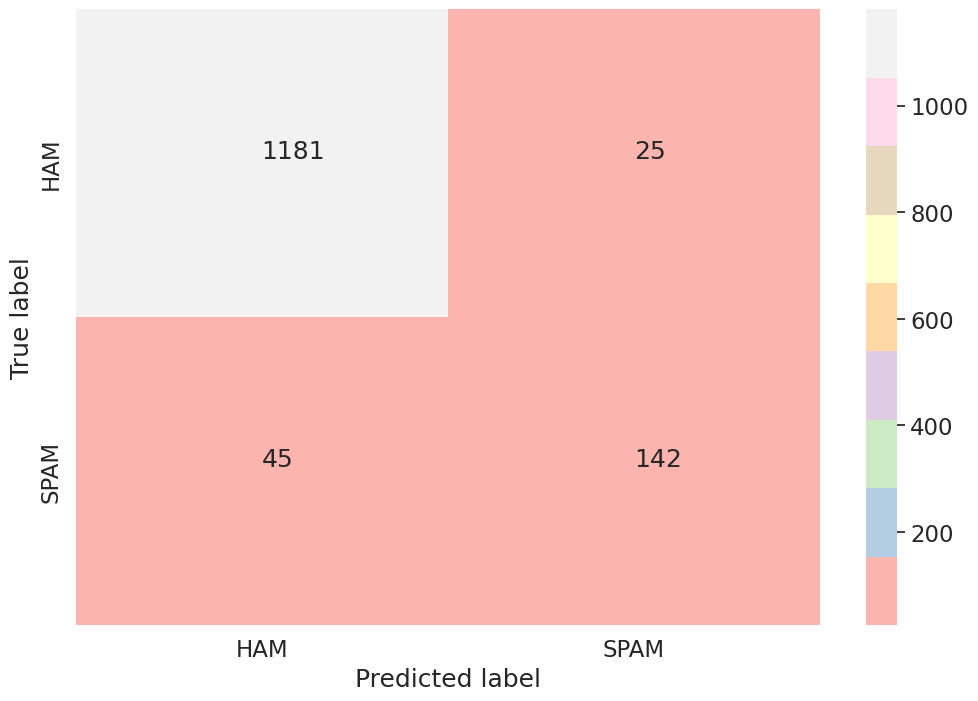

In [ ]:
import seaborn as sns

df_cm = pd.DataFrame(confusion, index = ["HAM", "SPAM"],
                  columns = ["HAM", "SPAM"])
plt.figure(figsize = (12,8))
sns.set(font_scale=1.5)
annot_kws = {"ha": 'left',"va": 'bottom'}
hm = sns.heatmap(df_cm, cmap="Pastel1", fmt="d", annot=True, annot_kws=annot_kws)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Test Sample Sentences
This function allows us to make predictions on arbitrary sentences using the trained model.

In [ ]:
def test_sentence(sentence):
    s = encode_sentence(sentence, embeddings)
    s = s.reshape((1,s.shape[0],s.shape[1]))
    prediction = model.predict(s)[0][0]
    if prediction >= 0.5:
        print("It's SPAM!")
    else:
        print("It's HAM!")
    print(f"Sigmoid: {prediction}")

In [ ]:
test_sentence("""Enter to win $25,000 and get a Free Hotel Night! Just click
    here for a $1 trial membership in NetMarket, the Internet's
    premier discount shopping site:
    http://www.netmarket.com/MEM/scripts/outsidePromo.asp?ref=yoyo_shp01""")
test_sentence("""My system has been down for the past 48 hours. Please help.""")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
It's SPAM!
Sigmoid: 0.7015069127082825
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
It's HAM!
Sigmoid: 0.016925320029258728
